In [21]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
seednumber = rnd.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)



,y,ds
0,7.953318,2017-07-28
1,8.695674,2017-07-27
2,8.722417,2017-07-26
3,8.634798,2017-07-25
4,8.655911,2017-07-24
5,8.202756,2017-07-23
6,8.520587,2017-07-22
7,8.917177,2017-07-21
8,8.603004,2017-07-20
9,8.627302,2017-07-19


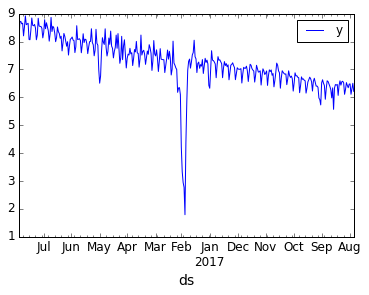

In [22]:
import datetime 

datapath = "./"
df = pd.read_csv(datapath+"CompleteOrder_HANOI_1year.csv") #FB requires y-variable
df['y'] = np.log(df['completed_orders'])
df = df.drop('completed_orders', axis = 1)
df = df.drop('percent_completed', axis = 1)
df['ds'] = df['to_char']
df = df.drop('to_char', axis = 1)
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds').plot()
df

In [25]:
articles = pd.DataFrame({
  'holiday': 'publish',
  'ds': pd.to_datetime(['2016-04-30', '2016-05-01', '2016-09-02', '2016 - 12 - 31',
                        '2017 - 01 - 01', '2017 - 01 - 02', '2017 - 01 - 26', '2017 - 01 - 27',
                        '2017 - 01 - 28', '2017 - 01 - 29', '2017 - 01 - 30', '2017 - 01 - 31',
                        '2017 - 02 - 01', '2017-04-30', '2017-05-01', '2017-09-02']),
  'lower_window': 0,
  'upper_window': 5,
})

m = Prophet(holidays=articles, mcmc_samples=500, yearly_seasonality=True, changepoint_prior_scale = 0.07)
model = m.fit(df)



In [30]:
future1 = m.make_future_dataframe(periods=365)
forecast1 = model.predict(future1)
lastfive = np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())


In [27]:
yhat = np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']])
ds = forecast1[['ds']] 


In [28]:
oneyeartable = pd.concat([yhat, ds], axis=1)


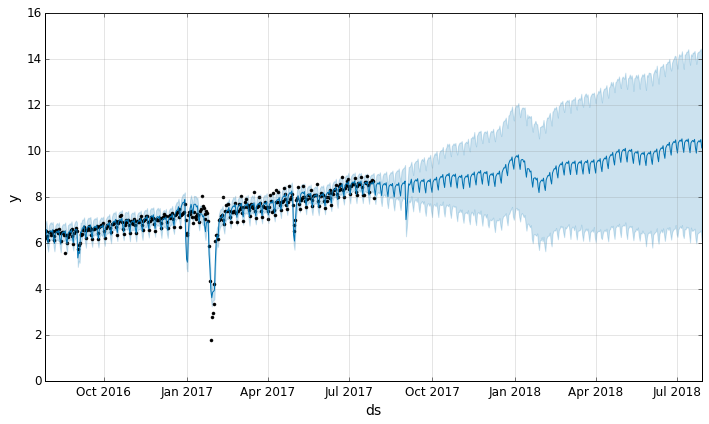

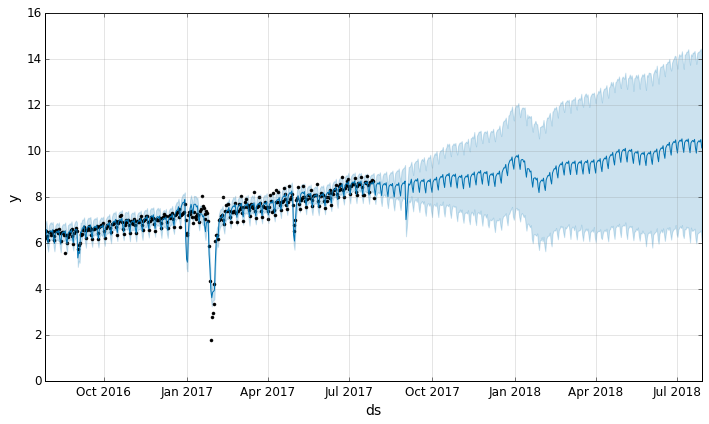

In [29]:
m.plot(forecast1)


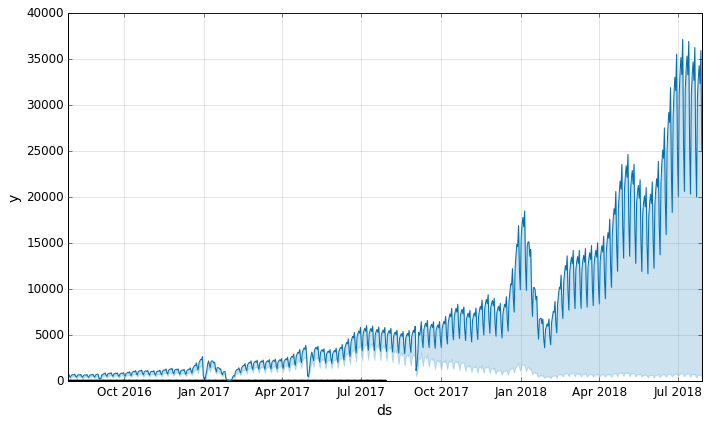

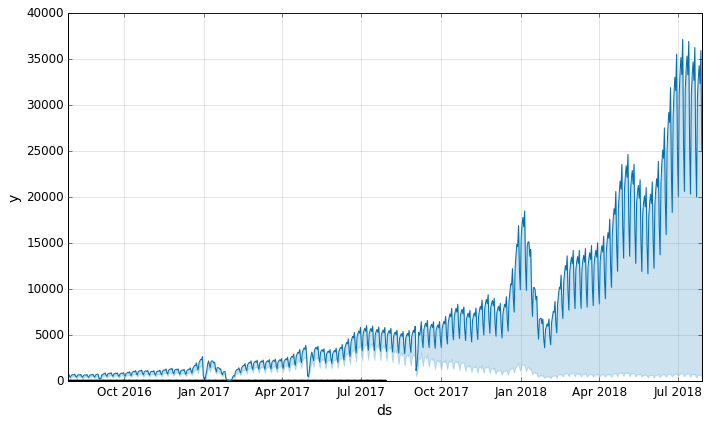

In [36]:
realval = np.exp(forecast1[['yhat']])
oneyeartable1 = oneyeartable
oneyeartable1.yhat_upper = oneyeartable1.yhat
# oneyeartable1.yh = oneyeartable1.drop("yhat_lower", axis = 1)
m.plot(oneyeartable1)

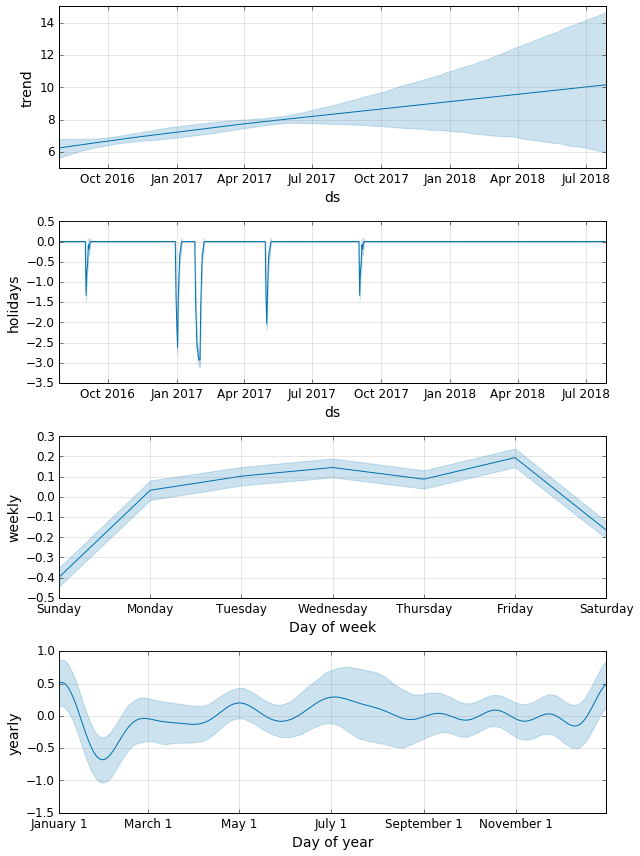

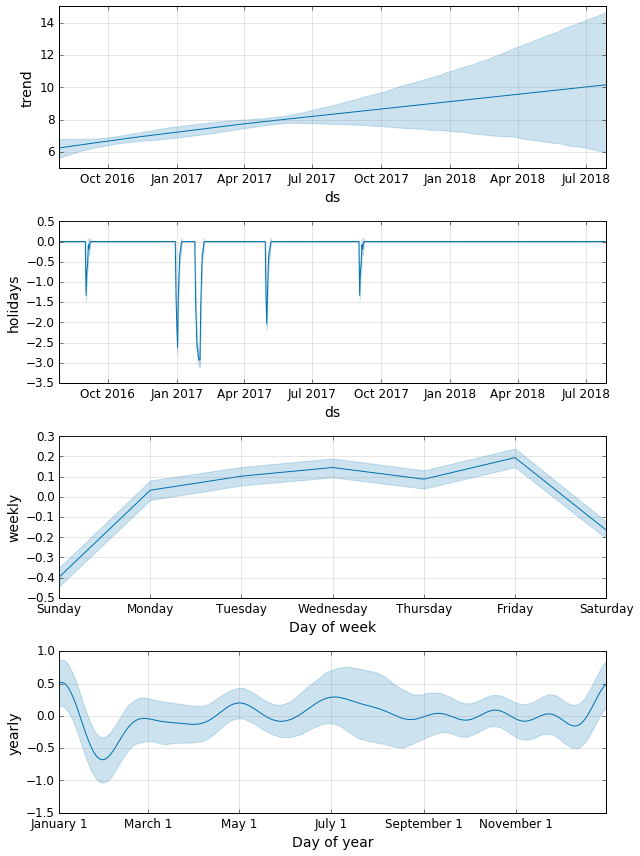

In [37]:
m.plot_components(forecast1)


In [39]:
oneyeartable.to_csv("Oneyearforecast_HAN.csv")